# Machine Learning

Now to the main event - machine learning!

Machine learning is a type of artificial intelligence which focuses on the use of data and algorithms to imitate the way that humans learn, gradually improving its accuracy. <b> Machine learning is used for analyzing data and predicting outcomes.</b>

In this work we will focus on a few basic machine learning algorithms but there are loads out there. Feel free to experiment and find others you want to try if you want!

We will be using the <em>[sklearn](https://scikit-learn.org/stable/)</em> library which is commonly used for machine learning. We will also be using <em>[pandas](https://pandas.pydata.org/)</em> (like you used in the last tutorial) for handling our data.

First we must import the libraries. Instead of just importing sklearn we will import certain parts of the library that we will need.

In [ ]:
import pandas as pd
from sklearn import model_selection, preprocessing, linear_model, svm, tree, metrics

In this notebook we will be using the lung cancer prediction data set. We will be trying to predict whether a patient has lung cancer or not from different symptoms.

We will load our data like we did last time:

In [ ]:
df = pd.read_csv('./Data/survey lung cancer new.csv')

In [ ]:
df['GENDER'] = df['GENDER'].replace('M', 1)
df['GENDER'] = df['GENDER'].replace('F', 2)

In [ ]:
df.head()

From this data we are trying to predict the value in the LUNG_CANCER column using the other columns.

When we do machine learning it is very important that we split the data into two parts:
1. Training set
2. Testing set

The training set will be used to train the model - we will give it both the symptoms and the answer (LUNG_CANCER)

The testing set will be used to test the model - we will give the model the symptoms <b>only</b>.

<em>[sklearn](https://scikit-learn.org/stable/)</em> has a function to split the data into the test and train set for us.  We will take 20% of the data for testing (test_size=0.2) and to make sure that we get the same data in the test and train set every time we can set a random state (random_state=42) this can be any number you like, if you change it different patients will be put into the test and train set.


In [ ]:
train_set, test_set = model_selection.train_test_split(df, test_size=0.2, random_state=42)

We can look at the size of the test and train set using the <em>[shape](https://www.digitalocean.com/community/tutorials/python-shape-method)</em> function.

In [ ]:
print(train_set.shape)
print(test_set.shape)

We can look at how many patients have lung cancer in the test and train set using <em>[value_counts](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)</em> like we did in the last notebook.

In [ ]:
print(train_set['LUNG_CANCER'].value_counts())
print(test_set['LUNG_CANCER'].value_counts())

Now we need to get the symptoms (features) and separate them from our answer (target). Usually the features are denoted as X and the targets as y.

We can get the features using the <em>[drop](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)</em> function. This allows you to get rid of rows or columns from a dataset (depending on the value you give axis).

We get the targets by selecting only the LUNG_CANCER column.

In [ ]:
X_train = train_set.drop('LUNG_CANCER', axis=1)
y_train = train_set['LUNG_CANCER']

In [ ]:
scaler = preprocessing.MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)

In [ ]:
X_test = test_set.drop('LUNG_CANCER', axis=1)
y_test = test_set['LUNG_CANCER']

In [ ]:
X_test_norm = scaler.transform(X_test)

# Creating models

In this notebook we will be looking at three different machine learning techniques:
- logistic regression
- decision tree
- support vector machine

## Logistic regression

Logistic regression is a statistical method used for binary classification tasks in machine learning. In binary classification, we have data with two possible outcomes or classes, like "yes" or "no," "spam" or "not spam," etc.

The main idea behind logistic regression is to model the relationship between the input features (also known as independent variables or predictors) and the binary outcome using a S-shaped function called the logistic or sigmoid function. This is better than just using a stright line (linear regression) since the binary data can more easily be separated. The logistic function takes any input and maps it to a value between 0 and 1. This output can be interpreted as the probability of the instance belonging to one of the two classes.

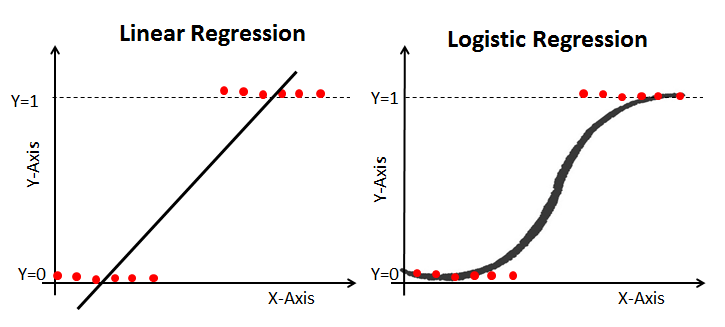

To train the logistic regression model, we use labeled data, which means we know the correct class for each instance in our dataset. The model adjusts its internal parameters (coefficients) to minimize a specific loss function, typically the cross-entropy loss, that quantifies how far off its predictions are from the true labels.

Once the model is trained, it can be used to make predictions on new, unseen data. When given an input with its corresponding features, the model calculates the probability of it belonging to one class or the other. To get the final binary classification, we choose a threshold value (often 0.5), so that probabilities above the threshold are classified as one class, and those below the threshold are classified as the other class.

For more info you can watch [this video](https://www.youtube.com/watch?v=yIYKR4sgzI8) or read [this article](https://towardsdatascience.com/understanding-logistic-regression-step-by-step-704a78be7e0a).

Now lets define the logistic regression model.


In [ ]:
logistic_regression = linear_model.LogisticRegression()

In this example we do not define any specific perameters for the model and so defaults are chosen for us. You can change the perameters of this model and see how that changes things. All changable perameters can be seen [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

Then we use the train set to train the model. This need the symptoms and the correct label for each patient. This can be done using the <em>fit</em> method.

In [ ]:
logistic_regression.fit(X_train, y_train)

## Decision tree

Decision trees are a popular machine learning algorithm used for classification (and regression) tasks. Decision trees use a flowchart-like structure, where each split represents a decision based on a specific feature (e.g. age > 60 or 'character in star wars' == True). There can be a large number of splits, until enough questions have been asked to asign a final category at the bottom of the tree (called a leaf node).

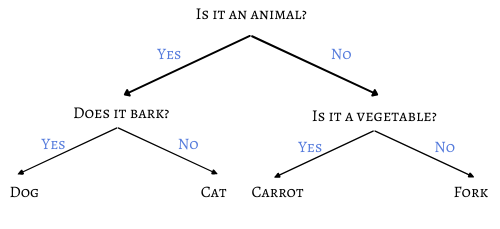

To build a decision tree, the algorithm keeps splitting the data based on the features that provide the most information when trying to spearate the classes. For example, if trying to separate cats from dogs, it might be better to split first on weight of animal rather than colour of fur, since weight of animal helps you separate more of the cats from the dogs.

The splitting process aims to divide the data into groups that only contain on of the classes at each leaf node, making the decision tree capable of making accurate predictions on new, unseen data. The depth of the tree (number of splits) determines the level of complexity, allowing us to ask more questions. However, it also increases the risk of overfitting (memorizing the training data but failing to generalise well to new data).

For more info you can watch [this video](https://youtu.be/_L39rN6gz7Y) or read [this article](https://www.analyticsvidhya.com/blog/2021/08/decision-tree-algorithm/).

In [ ]:
decision_tree = tree.DecisionTreeClassifier()

In this example we do not define any specific perameters for the model and so defaults are chosen for us. You can change the perameters of this model and see how that changes things. All changable perameters can be seen [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

In [ ]:
decision_tree.fit(X_train, y_train)

## Support vector machine (SVM)

Imagine you have a dataset with two classes, like "cats" and "dogs," and you want to draw a line (in two dimensions) to separate them based on their weight. This line should be able to separate most of the cats and dogs if we put the line at about 5kg, but there might be some big cats or small dogs that dont fit the trend. If we introduced another attribute like tail length maybe we could do better by drawing a plane in 3D which separates the cats and dogs more accurately based on these two features together. If we introduced more attributes like fur colour, size of ears, etc, we could draw a plane in higher dimensions (called a hyperplane) that lets us separate the classes as best as possible.  

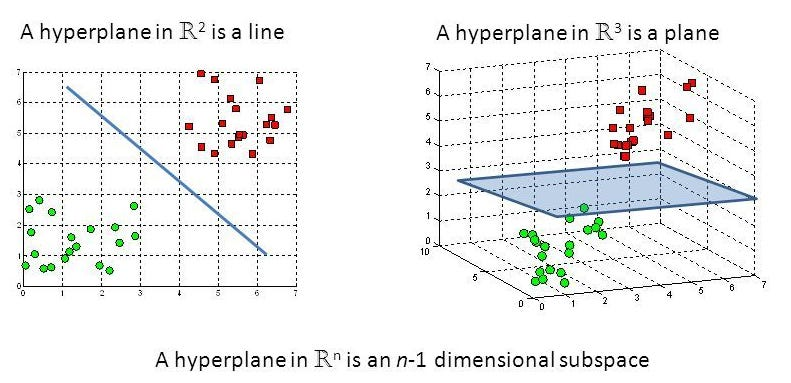

SVMs work by finding the best possible separating line or hyperplane for us based on the data. This line or hyperplane is called the "decision boundary." The unique aspect of SVMs is that they find the decision boundary that maximises the margin between the two classes. The margin is the distance between the decision boundary and the nearest data points of each class.

The data points closest to the decision boundary are called "support vectors", hence the name "Support Vector Machines." These support vectors are crucial because they influence the position and orientation of the decision boundary.

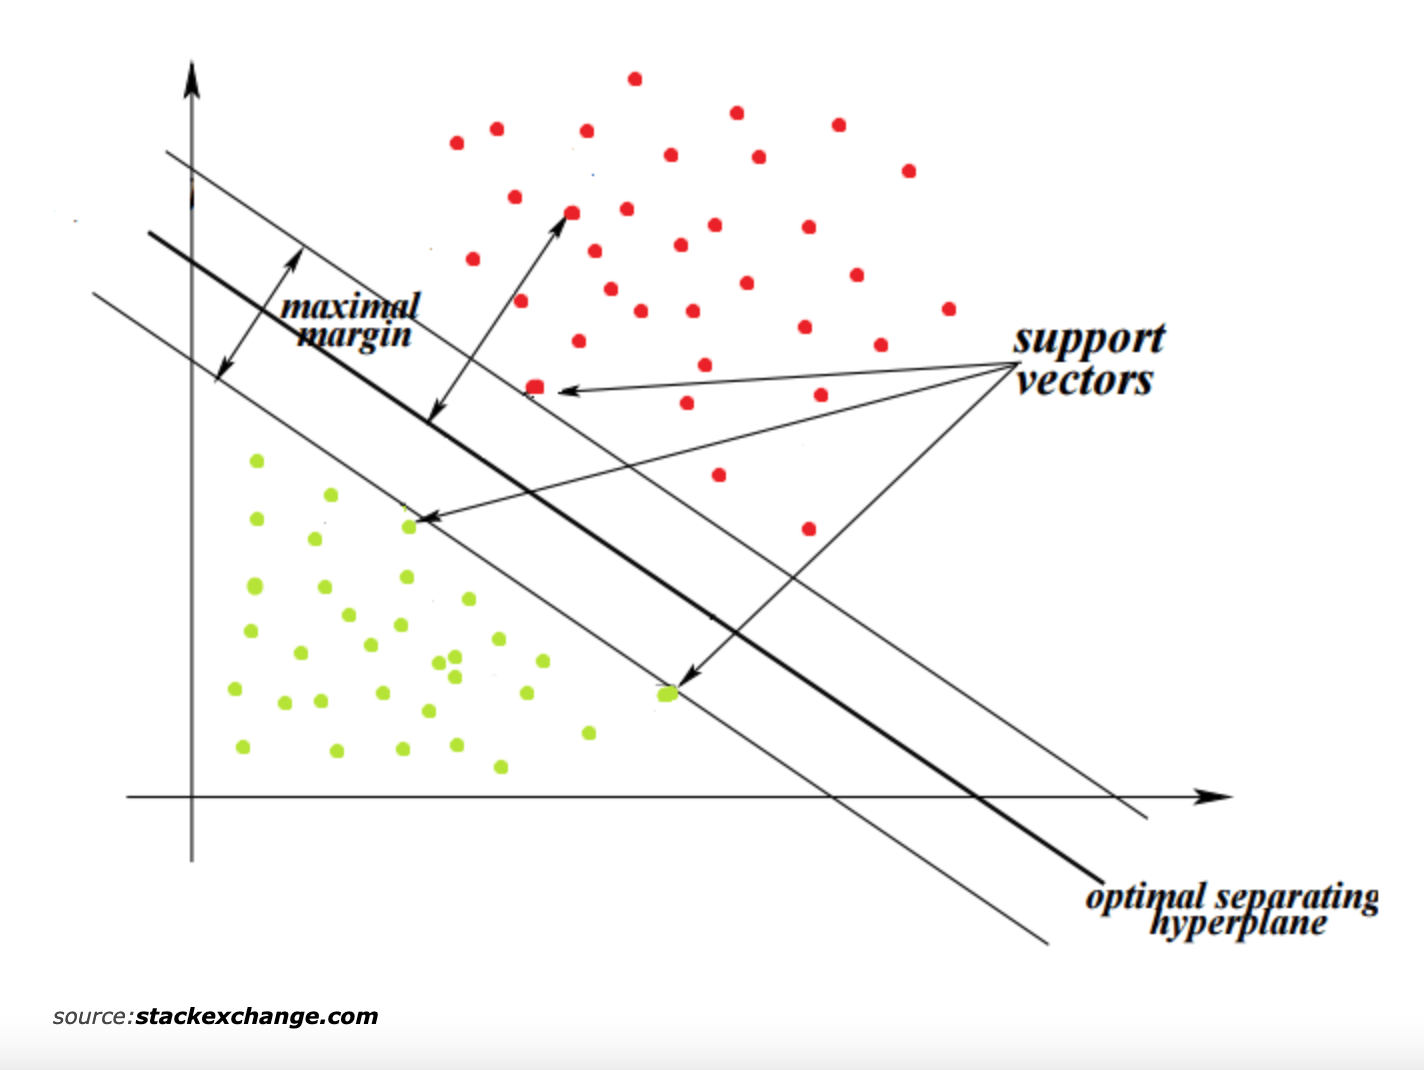

However, in some cases there may be no way to separate the classes using a straight line. Therefore, before doing this SVMs transform the input data into a higher-dimensional feature space where it becomes easier to find a separating hyperplane. This transformation is done using a mathematical function called the "kernel function" which introduces non-linearlity to the data. In the picture bleow we cant draw a line to separate the blue and red points, but if we project them into 3D we could draw a plane which separates them.

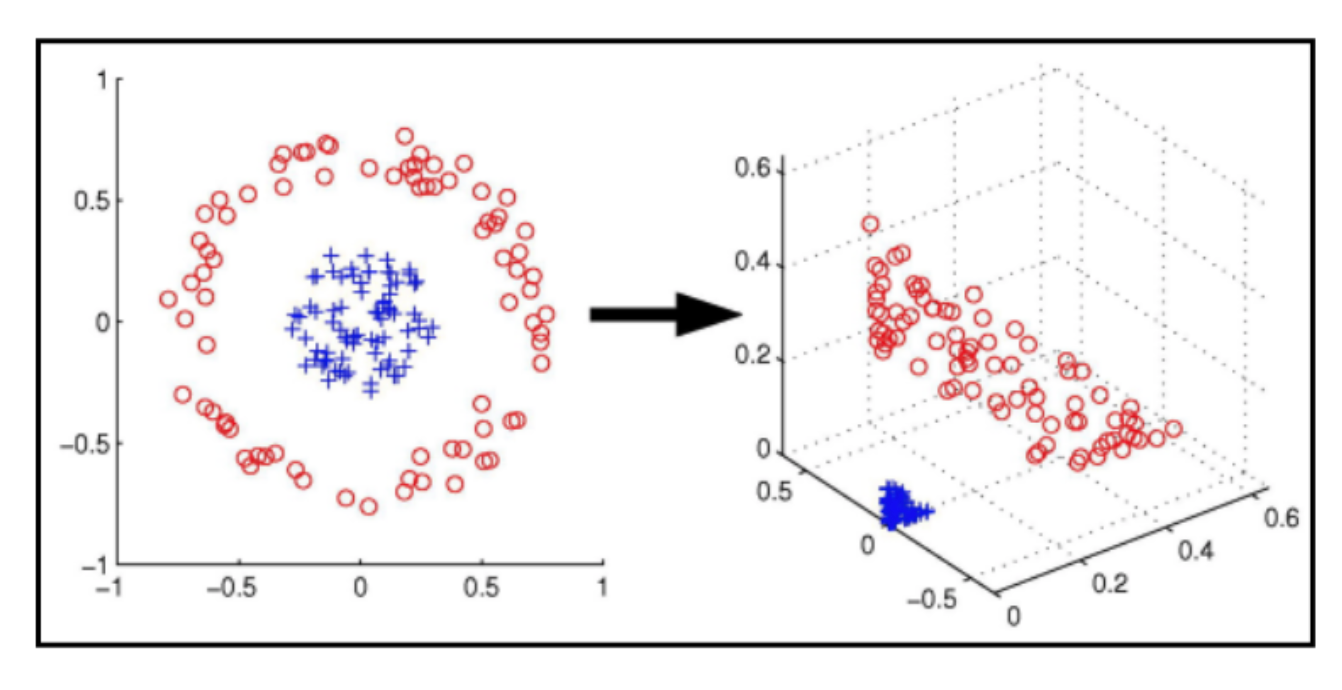

SVMs then aim to find the optimal hyperplane by solving an optimisation problem that involves maximizing the margin while also minimizing classification errors. SVMs are powerful and effective for dealing with complex datasets.

For more info you can watch [this video](https://youtu.be/efR1C6CvhmE) or read [this article](https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python).

In [ ]:
svm_model = svm.SVC()

In this example we do not define any specific perameters for the model and so defaults are chosen for us. You can change the perameters of this model and see how that changes things. All changable perameters can be seen [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

In [ ]:
svm_model.fit(X_train, y_train)

# Evaluating models

## Metrics

### Accuracy

There are many different ways to evaluate how well a classifier has performed. You have probably heard of accuracy (the number of correctly classified patients divided by the total number of patients). We write the equation for accuracy like this:

<center> $\frac{TP+TN}{TP+TN+FP+FN}$ </center>

- TP = true posistive (the number of patients with a disease that are predicted to have the disease)
- TN = true negative (the number of patients who do not have a disease that are predicted not to have the disease)
- FP = false postive (the number of patients who do not have the disease that are predicted to have the disease)
- FN = false negative (the number of patients who have the disease that are predicted not to have the disease)

Accuracy is sometimes good (and is very simple) but it has its downfalls.

Take a look at the example below, in this case we have 15 patients, 11 have the disease and 4 don't.

In [ ]:
example_df = pd.DataFrame({'True':['YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'NO', 'NO', 'NO'],
                           'Predicted':['YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES']})

example_df

In [ ]:
example_df['True'].value_counts()

We can get an accuracy score of 73.3% by just predicting that evryone has the disease.

In [ ]:
print(metrics.accuracy_score(example_df['True'], example_df['Predicted']))

So what other metrics are there?

There are lots you can use (feel free to do some research yourself) but we'll look at two in particular:

- precision
- recall

### Precision

Precision is the proportion of positive identifications that are correct and can be calculated using the equation below:

<center> $\frac{TP}{TP+FP}$ </center>

### Recall

Recall is the proportion of actual positives that were correctly identified and can be calculated using the equation below:

<center> $\frac{TP}{TP+FN}$ </center>



So now that we have some metrics let's see how well our three classifiers do. First we need to use our classifiers to predict whether the patients in the test set have lung cancer. This can be done using the <em> predict </em> method.

In [ ]:
log_reg_preds = logistic_regression.predict(X_test)

In [ ]:
tree_preds = decision_tree.predict(X_test)

In [ ]:
svm_preds = svm_model.predict(X_test)

For each of the evaluation metrics <em>sklearn</em> has a function to calculate it:
- <em>[accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)</em>
- <em>[precision_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)</em>
- <em>[recall_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score)</em>

In [ ]:
print('Logistic regression performance:')
print('Accuracy:', metrics.accuracy_score(y_test, log_reg_preds))
print('Precision:', metrics.precision_score(y_test, log_reg_preds, pos_label='YES'))
print('Recall:', metrics.recall_score(y_test, log_reg_preds, pos_label='YES'))

In [ ]:
print('Decision tree performance:')
print('Accuracy:', metrics.accuracy_score(y_test, tree_preds))
print('Precision:', metrics.precision_score(y_test, tree_preds, pos_label='YES'))
print('Recall:', metrics.recall_score(y_test, tree_preds, pos_label='YES'))

In [ ]:
print('Support vector machine performance:')
print('Accuracy:', metrics.accuracy_score(y_test, svm_preds))
print('Precision:', metrics.precision_score(y_test, svm_preds, pos_label='YES'))
print('Recall:', metrics.recall_score(y_test, svm_preds, pos_label='YES'))

### Confusion Matrix

Another way we can see how well a classifier performs is using a confusion matrix. A confusion matrix shows the ways in which your classification model is confused when it makes predictions.

On the side we have the true labels and on the bottom we have the predicted labels. The counts of correct and incorrect predictions are then filled into the table. A perfect classifier would only have non-zero numbers on the diagonal (true and predicted labels match).

<em> sklearn </em> has a function [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) to make the confusion matrix using the true and predicted labels. See how we make it using the example data we made above.

In [ ]:
cm_example = metrics.confusion_matrix(example_df['True'], example_df['Predicted'], labels=['YES', 'NO'])
print(cm_example)

We can make our confusion matrix look a bit better using the <em>sklearn</em> function [ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)

In [ ]:
disp_example = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_example, display_labels=['YES', 'NO'])
disp_example.plot()

Now let's look at it with the models we made on the lung cancer dataset.

In [ ]:
cm = metrics.confusion_matrix(y_test, log_reg_preds, labels=logistic_regression.classes_)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_regression.classes_)
disp.plot()

In [ ]:
cm = metrics.confusion_matrix(y_test, svm_preds, labels=svm_model.classes_)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot()

In [ ]:
cm = metrics.confusion_matrix(y_test, tree_preds, labels=decision_tree.classes_)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=decision_tree.classes_)
disp.plot()

Now you know everything you need to be able to do machine learning! It's time for you to get started on your projects for this week.